In [1]:
import math
import numpy as np
import scipy.stats as si
from scipy.stats import norm
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import warnings

In [2]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# Black-Scholes Model

#### Session 5 Slide 14

https://quantpie.co.uk/bsm_bin_c_formula/bs_bin_c_summary.php

https://prateek964.medium.com/digital-options-e9d1739bb016



In [3]:
S0 = 55
K = 50
r = 0.1
sigma = 0.2
T = 1
cash = 1
beta = 0.8

In [4]:
def BlackScholesCall(S0:float, 
                     K:float, 
                     r:float, 
                     sigma:float, 
                     T:float):
    
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    
    return value

In [5]:
def BlackScholesPut(S0:float, 
                     K:float, 
                     r:float, 
                     sigma:float, 
                     T:float):
    
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)
    
    return value

In [6]:
def BlackScholes_Digital_Cash_Nothing_Call(cash:float, 
                                           S0:float, 
                                           K:float, 
                                           r:float, 
                                           sigma:float, 
                                           T:float):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = cash*np.exp(-r*T)*norm.cdf(d2)
    
    return value

In [7]:
def BlackScholes_Digital_Cash_Nothing_Put(cash:float, 
                                           S0:float, 
                                           K:float, 
                                           r:float, 
                                           sigma:float, 
                                           T:float):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is exactly the same as the digital cash call other than the sign on d2
    value = cash*np.exp(-r*T)*norm.cdf(-d2)
    
    return value

In [8]:
def BlackScholes_Digital_Asset_Nothing_Call(S0:float, 
                                            K:float, 
                                            r:float, 
                                            sigma:float, 
                                            T:float):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is the first part of the vanilla BS call. When cash=K, the Asset or nothing call is equal to the cash or nothing call + vanilla call
    value = S0*norm.cdf(d1)
    
    return value

In [9]:
def BlackScholes_Digital_Asset_Nothing_Put(S0:float, 
                                            K:float, 
                                            r:float, 
                                            sigma:float, 
                                            T:float):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is the second part of the vanilla BS put. When cash=K, the Asset or nothing put is equal to the cash or nothing put - vanilla put
    value = S0*norm.cdf(-d1)
    
    return value

In [10]:
BlackScholesCall(S0=S0,
                K=K, 
                r=r, 
                sigma=sigma, 
                T=T)

10.624385719282188

In [11]:
BlackScholesPut(S0=S0,
                K=K, 
                r=r, 
                sigma=sigma, 
                T=T)

0.8662566210801677

In [12]:
BlackScholes_Digital_Cash_Nothing_Call(cash=cash, 
                                    S0=S0, 
                                    K=K, 
                                    r=r, 
                                    sigma=sigma, 
                                    T=T)

0.7325877630415972

In [13]:
BlackScholes_Digital_Cash_Nothing_Put(cash=cash, 
                                    S0=S0, 
                                    K=K, 
                                    r=r, 
                                    sigma=sigma, 
                                    T=T)

0.1722496549943623

In [14]:
BlackScholes_Digital_Asset_Nothing_Call(S0=S0, 
                                        K=K, 
                                        r=r, 
                                        sigma=sigma, 
                                        T=T)

47.25377387136205

In [15]:
BlackScholes_Digital_Asset_Nothing_Put(S0=S0, 
                                        K=K, 
                                        r=r, 
                                        sigma=sigma, 
                                        T=T)

7.7462261286379475

# Bachelier model

#### Session 5 Slide 7-8

Note: We are converting from Black-Scholes implied volatility to Bachelier implied volatility here

https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?article=7868&context=lkcsb_research

https://medium.com/@aaron_delarosa/implementing-bachelier-y-black-scholes-models-in-python-faf30527ae82



In [16]:
def BachelierCall(S0:float, 
                  K:float, 
                  r:float, 
                  sigma:float, 
                  T:float):
    
    """
    Calculate the value of a call option using the Bachelier model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Implied Volatility of the underlying asset from the Black-Scholes model
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the call option.
    """
    
    sigma = sigma*S0
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is the last line in slide 8, remember to flip the sign of x
    value = \
        np.exp(-r*T)*((S0-K)*norm.cdf(-x) 
                      + sigma*np.sqrt(T)*norm.pdf(-x))
    
    return value

In [17]:
def BachelierPut(S0:float, 
                  K:float, 
                  r:float, 
                  sigma:float, 
                  T:float):
    
    """
    Calculate the value of a put option using the Bachelier model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Implied Volatility of the underlying asset from the Black-Scholes model
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the put option.
    """
    
    sigma = sigma*S0
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is the last line in slide 8, but it is now strike minus spot price and we no longer flip x
    value = \
        np.exp(-r*T)*((K-S0)*norm.cdf(x) 
                      + sigma*np.sqrt(T)*norm.pdf(x))
    
    return value

In [18]:
def Bachelier_Digital_Cash_Nothing_Call(cash:float, 
                                        S0:float, 
                                        K:float, 
                                        r:float, 
                                        sigma:float, 
                                        T:float):
    
    """
    Calculate the value of a digital cash-or-nothing call option 
    using the Bachelier model.

    Parameters:
    cash  : float - Cash payout if the option finishes in the money
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Implied Volatility of the underlying asset from the Black-Scholes model
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital cash-or-nothing call option.
    """
    
    sigma = sigma*S0
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    value = cash*np.exp(-r*T)*norm.cdf(-x)
    
    return value

In [19]:
def Bachelier_Digital_Cash_Nothing_Put(cash:float, 
                                       S0:float, 
                                       K:float, 
                                       r:float, 
                                       sigma:float, 
                                       T:float):
    
    """
    Calculate the value of a digital cash-or-nothing put option 
    using the Bachelier model.

    Parameters:
    cash  : float - Cash payout if the option finishes in the money
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Implied Volatility of the underlying asset from the Black-Scholes model
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital cash-or-nothing put option.
    """
    
    sigma = sigma*S0
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    value = cash*np.exp(-r*T)*norm.cdf(x)
    
    return value

In [20]:
def Bachelier_Digital_Asset_Nothing_Call(S0:float, 
                                         K:float, 
                                         r:float, 
                                         sigma:float, 
                                         T:float):
    
    """
    Calculate the value of a digital asset-or-nothing call option 
    using the Bachelier model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Implied Volatility of the underlying asset from the Black-Scholes model
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital asset-or-nothing call option.
    """
    
    sigma = sigma*S0
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is similar to the vanilla BachelierCall call, just that we do not deduct K from S0
    value = np.exp(-r*T)*(S0*norm.cdf(-x) + sigma*np.sqrt(T)*norm.pdf(-x))
    
    return value

In [21]:
def Bachelier_Digital_Asset_Nothing_Put(S0:float, 
                                        K:float, 
                                        r:float, 
                                        sigma:float, 
                                        T:float):
    
    """
    Calculate the value of a digital asset-or-nothing put option 
    using the Bachelier model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Implied Volatility of the underlying asset from the Black-Scholes model
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital asset-or-nothing put option.
    """
    
    sigma = sigma*S0
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is similar to the vanilla BachelierCall call, just that we do not deduct K from S0
    value = np.exp(-r*T)*(S0*norm.cdf(x) - sigma*np.sqrt(T)*norm.pdf(x))
    
    return value

In [22]:
BachelierCall(S0=S0, 
            K=K, 
            r=r, 
            sigma=sigma, 
            T=T)

6.636133204981749

In [23]:
BachelierPut(S0=S0, 
            K=K, 
            r=r, 
            sigma=sigma, 
            T=T)

2.1119461148019516

In [24]:
Bachelier_Digital_Cash_Nothing_Call(cash=cash, 
                                    S0=S0, 
                                    K=K, 
                                    r=r, 
                                    sigma=sigma, 
                                    T=T)

0.6110202929628668

In [25]:
Bachelier_Digital_Cash_Nothing_Put(cash=cash, 
                                    S0=S0, 
                                    K=K, 
                                    r=r, 
                                    sigma=sigma, 
                                    T=T)

0.29381712507309277

In [26]:
Bachelier_Digital_Asset_Nothing_Call(S0=S0, 
                                     K=K, 
                                     r=r, 
                                     sigma=sigma, 
                                     T=T)

37.18714785312508

In [27]:
Bachelier_Digital_Asset_Nothing_Put(S0=S0, 
                                     K=K, 
                                     r=r, 
                                     sigma=sigma, 
                                     T=T)

12.578910138852686

# Black model

#### Session 5 Slide 15-16

https://analystprep.com/study-notes/cfa-level-2/describe-how-the-black-model-is-used-to-value-european-options-on-futures/

https://www.investopedia.com/terms/b/blacksmodel.asp




In [28]:
def BlackCall(S0:float, 
              K:float, 
              r:float, 
              sigma:float, 
              T:float):
    
    """
    Calculate the value of a call option using the Black model (for forwards/futures).

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the call option.
    """
    
    F0 = np.exp(r*T)*S0
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma * np.sqrt(T)
    
    # Last line in slide 16
    value = np.exp(-r*T) * (F0 * norm.cdf(d1) - K * norm.cdf(d2))
    
    return value

In [29]:
def BlackPut(S0:float, 
            K:float, 
            r:float, 
            sigma:float, 
            T:float):

    """
    Calculate the value of a put option using the Black model (for forwards/futures).

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the put option.
    """
    
    F0 = np.exp(r*T)*S0
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma * np.sqrt(T)
    
    # Last line in slide 16, but order is flipped, just like BlackScholes put
    value = np.exp(-r*T) * (K * norm.cdf(-d2) - F0 * norm.cdf(-d1))
    
    return value

In [30]:
def Black_Digital_Cash_Nothing_Call(cash:float, 
                                    S0:float, 
                                    K:float, 
                                    r:float, 
                                    sigma:float, 
                                    T:float):
    
    """
    Calculate the value of a digital cash-or-nothing call option using the Black model.

    Parameters:
    cash  : float - Fixed cash payout if the option finishes in the money
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital cash-or-nothing call option.
    """
    
    F0 = np.exp(r*T)*S0
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = cash*np.exp(-r*T)*norm.cdf(d2)
    
    return value

In [31]:
def Black_Digital_Cash_Nothing_Put(cash:float, 
                                   S0:float, 
                                   K:float, 
                                   r:float, 
                                   sigma:float, 
                                   T:float):
    
    """
    Calculate the value of a digital cash-or-nothing put option using the Black model.

    Parameters:
    cash  : float - Fixed cash payout if the option finishes in the money
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital cash-or-nothing put option.
    """
    
    F0 = np.exp(r*T)*S0
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = cash*np.exp(-r*T)*norm.cdf(-d2)
    
    return value

In [32]:
def Black_Digital_Asset_Nothing_Call(S0:float, 
                                     K:float, 
                                     r:float, 
                                     sigma:float, 
                                     T:float):
    
    """
    Calculate the value of a digital asset-or-nothing call option using the Black model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital asset-or-nothing call option.
    """
    
    F0 = np.exp(r*T)*S0
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is the first part of the vanilla Black call. When cash=K, the Asset or nothing call is equal to the cash or nothing call + vanilla call
    value = np.exp(-r*T) * (F0 * norm.cdf(d1))
    
    return value

In [33]:
def Black_Digital_Asset_Nothing_Put(S0:float, 
                                    K:float, 
                                    r:float, 
                                    sigma:float, 
                                    T:float):
    
    """
    Calculate the value of a digital asset-or-nothing put option using the Black model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)

    Returns:
    float - The value of the digital asset-or-nothing put option.
    """
    
    F0 = np.exp(r*T)*S0
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is the second part of the vanilla Black put. When cash=K, the Asset or nothing put is equal to the cash or nothing put - vanilla put
    value = np.exp(-r*T) * (F0 * norm.cdf(-d1))
    
    return value

In [34]:
BlackCall(S0=S0, 
          K=K, 
          r=r, 
          sigma=sigma, 
          T=T)

10.624385719282184

In [35]:
BlackPut(S0=S0, 
          K=K, 
          r=r, 
          sigma=sigma, 
          T=T)

0.866256621080164

In [36]:
Black_Digital_Cash_Nothing_Call(cash=cash, 
                                S0=S0, 
                                K=K, 
                                r=r, 
                                sigma=sigma, 
                                T=T)

0.7325877630415971

In [37]:
Black_Digital_Cash_Nothing_Put(cash=cash, 
                                S0=S0, 
                                K=K, 
                                r=r, 
                                sigma=sigma, 
                                T=T)

0.1722496549943624

In [38]:
Black_Digital_Asset_Nothing_Call(S0=S0, 
                                K=K, 
                                r=r, 
                                sigma=sigma, 
                                T=T)

47.25377387136204

In [39]:
Black_Digital_Asset_Nothing_Put(S0=S0, 
                                K=K, 
                                r=r, 
                                sigma=sigma, 
                                T=T)

7.746226128637957

# Displaced-diffusion model

#### Session 6 Slide 11-14

In [40]:
def DisplacedDiffusionCall(S0:float, 
                           K:float, 
                           r:float, 
                           sigma:float, 
                           T:float,
                           beta:float):
    
    """
    Calculate the value of a call option under the displaced diffusion model.
    
    Parameters:
    S0 : float  - Spot price of the underlying asset
    K  : float  - Strike price
    r  : float  - Risk-free interest rate
    sigma : float  - Volatility of the underlying asset
    T  : float  - Time to maturity (in years)
    beta : float - Displacement parameter (0 < beta <= 1)
    
    Returns:
    float - The value of the displaced diffusion call option
    """
    
    F0 = np.exp(r*T)*S0
    
    # From Session 6, slide 14
    DD_FO=F0/beta
    
    DD_K=K+((1-beta)/beta)*F0
    
    DD_sigma=sigma*beta
    
    # Refer to last line in Session 5, slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(DD_FO/DD_K) + 0.5 * (DD_sigma**2) * T) / (DD_sigma*np.sqrt(T))
    
    d2 = d1 - DD_sigma * np.sqrt(T)
    
    # Last line in Session 5, slide 16
    value = np.exp(-r*T) * (DD_FO * norm.cdf(d1) - DD_K * norm.cdf(d2))
    
    return value

In [41]:
def DisplacedDiffusionPut(S0:float, 
                          K:float, 
                          r:float, 
                          sigma:float, 
                          T:float,
                          beta:float):
    
    """
    Calculate the value of a put option under the displaced diffusion model.

    Parameters:
    S0 : float  - Spot price of the underlying asset
    K  : float  - Strike price
    r  : float  - Risk-free interest rate
    sigma : float  - Volatility of the underlying asset
    T  : float  - Time to maturity (in years)
    beta : float - Displacement parameter (0 < beta <= 1)

    Returns:
    float - The value of the displaced diffusion put option
    """
    
    F0 = np.exp(r*T)*S0
    
    # From Session 6, slide 14
    DD_F0=F0/beta
    
    DD_K=K+((1-beta)/beta)*F0
    
    DD_sigma=sigma*beta
    
    # Refer to last line in Session 5, slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(DD_F0/DD_K) + 0.5 * (DD_sigma**2) * T) / (DD_sigma*np.sqrt(T))
    
    d2 = d1 - DD_sigma * np.sqrt(T)
    
    # Last line in Session 5,slide 16, but order is flipped, just like BlackScholes put
    value = np.exp(-r*T) * (DD_K * norm.cdf(-d2) - DD_F0 * norm.cdf(-d1))
    
    return value

In [42]:
def DisplacedDiffusion_Digital_Cash_Nothing_Call(cash:float, 
                                                S0:float, 
                                                K:float, 
                                                r:float, 
                                                sigma:float, 
                                                T:float,
                                                beta:float):
    
    """
    Calculate the value of a digital cash-or-nothing call option 
    under the displaced diffusion model.

    Parameters:
    cash  : float - Cash payout if the option finishes in the money
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)
    beta  : float - Displacement parameter (0 < beta <= 1)

    Returns:
    float - The value of the digital cash-or-nothing call option
    """
    
    F0 = np.exp(r*T)*S0
    
    # From Session 6, slide 14
    DD_F0=F0/beta
    
    DD_K=K+((1-beta)/beta)*F0
    
    DD_sigma=sigma*beta
    
    # Refer to last line in Session 5, slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(DD_F0/DD_K) + 0.5 * (DD_sigma**2) * T) / (DD_sigma*np.sqrt(T))
    
    d2 = d1 - DD_sigma * np.sqrt(T)
    
    value = cash*np.exp(-r*T)*norm.cdf(d2)
    
    return value

In [43]:
def DisplacedDiffusion_Digital_Cash_Nothing_Put(cash:float, 
                                                S0:float, 
                                                K:float, 
                                                r:float, 
                                                sigma:float, 
                                                T:float,
                                                beta:float):
    
    """
    Calculate the value of a digital cash-or-nothing put option 
    under the displaced diffusion model.

    Parameters:
    cash  : float - Cash payout if the option finishes in the money
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)
    beta  : float - Displacement parameter (0 < beta <= 1)

    Returns:
    float - The value of the digital cash-or-nothing put option
    """
    
    F0 = np.exp(r*T)*S0
    
    # From Session 6, slide 14
    DD_F0=F0/beta
    
    DD_K=K+((1-beta)/beta)*F0
    
    DD_sigma=sigma*beta
    
    # Refer to last line in Session 5, slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(DD_F0/DD_K) + 0.5 * (DD_sigma**2) * T) / (DD_sigma*np.sqrt(T))
    
    d2 = d1 - DD_sigma * np.sqrt(T)
    
    value = cash*np.exp(-r*T)*norm.cdf(-d2)
    
    return value

In [44]:
def DisplacedDiffusion_Digital_Asset_Nothing_Call(S0:float, 
                                                  K:float, 
                                                  r:float, 
                                                  sigma:float, 
                                                  T:float,
                                                  beta:float):
    
    """
    Calculate the value of a digital asset-or-nothing call option 
    under the displaced diffusion model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)
    beta  : float - Displacement parameter (0 < beta <= 1)

    Returns:
    float - The value of the digital asset-or-nothing call option
    """
    
    F0 = np.exp(r*T)*S0
    
    # From Session 6, slide 14
    DD_F0=F0/beta
    
    DD_K=K+((1-beta)/beta)*F0
    
    DD_sigma=sigma*beta
    
    # Refer to last line in Session 5, slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(DD_F0/DD_K) + 0.5 * (DD_sigma**2) * T) / (DD_sigma*np.sqrt(T))
    
    d2 = d1 - DD_sigma * np.sqrt(T)
    
    # This is the first part of the vanilla Displaced Diffusion call. When cash=K, the Asset or nothing call is equal to the cash or nothing call + vanilla call
    value = np.exp(-r*T) * (DD_F0 * norm.cdf(d1))
    
    return value

In [45]:
def DisplacedDiffusion_Digital_Asset_Nothing_Put(S0:float, 
                                                 K:float, 
                                                 r:float, 
                                                 sigma:float, 
                                                 T:float,
                                                 beta:float):
    
    """
    Calculate the value of a digital asset-or-nothing put option 
    under the displaced diffusion model.

    Parameters:
    S0    : float - Spot price of the underlying asset
    K     : float - Strike price
    r     : float - Risk-free interest rate
    sigma : float - Volatility of the underlying asset
    T     : float - Time to maturity (in years)
    beta  : float - Displacement parameter (0 < beta <= 1)

    Returns:
    float - The value of the digital asset-or-nothing put option
    """
    
    F0 = np.exp(r*T)*S0
    
    # From Session 6, slide 14
    DD_F0=F0/beta
    
    DD_K=K+((1-beta)/beta)*F0
    
    DD_sigma=sigma*beta
    
    # Refer to last line in Session 5, slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(DD_F0/DD_K) + 0.5 * (DD_sigma**2) * T) / (DD_sigma*np.sqrt(T))
    
    d2 = d1 - DD_sigma * np.sqrt(T)
    
    # This is the second part of the vanilla Displaced-Diffusion put. When cash=K, the Asset or nothing put is equal to the cash or nothing put - vanilla put
    value = np.exp(-r*T) * (DD_F0 * norm.cdf(-d1))
    
    return value

In [46]:
DisplacedDiffusionCall(S0=S0, 
                       K=K, 
                       r=r, 
                       sigma=sigma, 
                       T=T,
                       beta=beta)

10.677518417159055

In [47]:
DisplacedDiffusionPut(S0=S0, 
                       K=K, 
                       r=r, 
                       sigma=sigma, 
                       T=T,
                       beta=beta)

0.9193893189570322

In [48]:
DisplacedDiffusion_Digital_Cash_Nothing_Call(cash=cash, 
                                            S0=S0, 
                                            K=K, 
                                            r=r, 
                                            sigma=sigma, 
                                            T=T,
                                            beta=beta)

0.7326322236839359

In [49]:
DisplacedDiffusion_Digital_Cash_Nothing_Put(cash=cash, 
                                            S0=S0, 
                                            K=K, 
                                            r=r, 
                                            sigma=sigma, 
                                            T=T,
                                            beta=beta)

0.1722051943520237

In [50]:
DisplacedDiffusion_Digital_Asset_Nothing_Call(S0=S0, 
                                              K=K, 
                                              r=r, 
                                              sigma=sigma, 
                                              T=T,
                                              beta=beta)

58.4422822261888

In [51]:
DisplacedDiffusion_Digital_Asset_Nothing_Put(S0=S0, 
                                              K=K, 
                                              r=r, 
                                              sigma=sigma, 
                                              T=T,
                                              beta=beta)

10.307717773811195

# Creating charts

In [52]:
# Use this ONLY if the options model parameters are S0,K,r,sigma,T

def OptionsModel(model):
    # Initial parameters
    S_init = 50
    K_init = 55
    r_init = 0.10
    sigma_init = 0.2
    T_init = 1

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S
    S_range = np.linspace(10, 210, 200)
    prices = [model(S, K_init, r_init, sigma_init, T_init) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([10, 210])
    ax.set_ylim([0, max(prices) * 1.1])
    ax.set_xlabel('Initial Underlying Price')
    ax.set_ylabel('Option Price')
    ax.set_title(f"{model.__name__} Option Price")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S_init)

    rf_slider_ax = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r_init)

    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T_init)

    strike_slider_ax = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K_init)

    sigma_slider_ax = fig.add_axes([0.25, 0.10, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma_init)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        K_current = strike_slider.val
        r_current = rf_slider.val
        sigma_current = sigma_slider.val
        T_current = time_slider.val

        prices = [model(S, K_current, r_current, sigma_current, T_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([0, max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

In [53]:
# Use this ONLY if the options model parameters are cash,S0,K,r,sigma,T

def OptionsModelWithCash(model):
    # Initial parameters
    cash_init=1
    S_init = 50
    K_init = 55
    r_init = 0.1
    sigma_init = 0.2
    T_init = 1

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S
    S_range = np.linspace(10, 210, 200)
    prices = [model(cash_init, S, K_init, r_init, sigma_init, T_init) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([10, 210])
    ax.set_ylim([0, max(prices) * 1.1])
    ax.set_xlabel('Initial Underlying Price')
    ax.set_ylabel('Option Price')
    ax.set_title(f"{model.__name__} Option Price")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S_init)

    rf_slider_ax = fig.add_axes([0.25, 0.28, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r_init)

    time_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T_init)

    strike_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K_init)

    sigma_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma_init)
    
    cash_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    cash_slider = Slider(cash_slider_ax, 'Cash', 50, 150, valinit=cash_init)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        K_current = strike_slider.val
        r_current = rf_slider.val
        sigma_current = sigma_slider.val
        T_current = time_slider.val
        cash_current = cash_slider.val

        prices = [model(cash_current, S, K_current, r_current, sigma_current, T_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([0, max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    cash_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
        cash_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

In [54]:
# Use this ONLY if the options model parameters are S0,K,r,sigma,T,beta

def OptionsModelWithBeta(model):
    # Initial parameters
    S_init = 50
    K_init = 55
    r_init = 0.1
    sigma_init = 0.2
    T_init = 1
    beta_init=0.2

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S
    S_range = np.linspace(10, 210, 200)
    prices = [model(S, K_init, r_init, sigma_init, T_init, beta_init) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([10, 210])
    ax.set_ylim([0, max(prices) * 1.1])
    ax.set_xlabel('Initial Underlying Price')
    ax.set_ylabel('Option Price')
    ax.set_title(f"{model.__name__} Option Price")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S_init)

    rf_slider_ax = fig.add_axes([0.25, 0.28, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r_init)

    time_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T_init)

    strike_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K_init)

    sigma_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma_init)
    
    beta_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    beta_slider = Slider(beta_slider_ax, 'Beta', 0.1, 0.9, valinit=beta_init)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        K_current = strike_slider.val
        r_current = rf_slider.val
        sigma_current = sigma_slider.val
        T_current = time_slider.val
        beta_current = beta_slider.val

        prices = [model(S, K_current, r_current, sigma_current, T_current, beta_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([0, max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    beta_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
        beta_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

In [55]:
# Use this ONLY if the options model parameters are cash,S0,K,r,sigma,T,beta

def OptionsModelWithCashBeta(model):
    # Initial parameters
    cash_init=1
    S_init = 50
    K_init = 55
    r_init = 0.1
    sigma_init = 0.2
    T_init = 1
    beta_init=0.2    #beta must be between 0 and 1

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S
    S_range = np.linspace(10, 210, 200)
    prices = [model(cash_init, S, K_init, r_init, sigma_init, T_init, beta_init) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([10, 210])
    ax.set_ylim([0, max(prices) * 1.1])
    ax.set_xlabel('Initial Underlying Price')
    ax.set_ylabel('Option Price')
    ax.set_title(f"{model.__name__} Option Price")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S_init)

    rf_slider_ax = fig.add_axes([0.25, 0.28, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r_init)

    time_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T_init)

    strike_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K_init)

    sigma_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma_init)
    
    beta_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    beta_slider = Slider(beta_slider_ax, 'Beta', 0.1, 0.9, valinit=beta_init)
    
    cash_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.03], facecolor=axis_color)
    cash_slider = Slider(cash_slider_ax, 'Cash', 50, 150, valinit=cash_init)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        K_current = strike_slider.val
        r_current = rf_slider.val
        sigma_current = sigma_slider.val
        T_current = time_slider.val
        beta_current = beta_slider.val
        cash_current = cash_slider.val

        prices = [model(cash_current, S, K_current, r_current, sigma_current, T_current, beta_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([0, max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    beta_slider.on_changed(sliders_on_changed)
    cash_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
        beta_slider.reset()
        cash_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

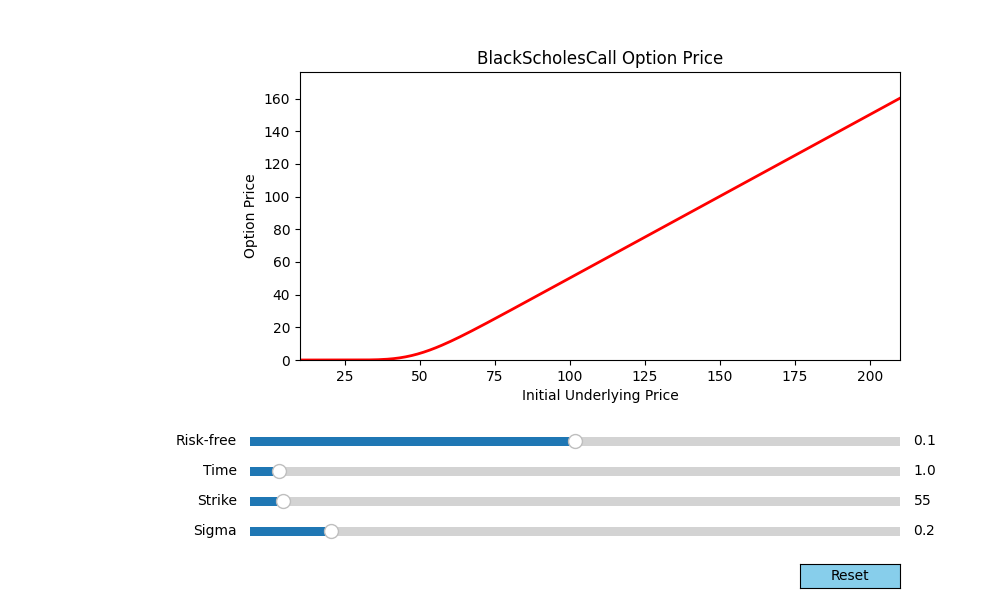

In [56]:
OptionsModel(BlackScholesCall)

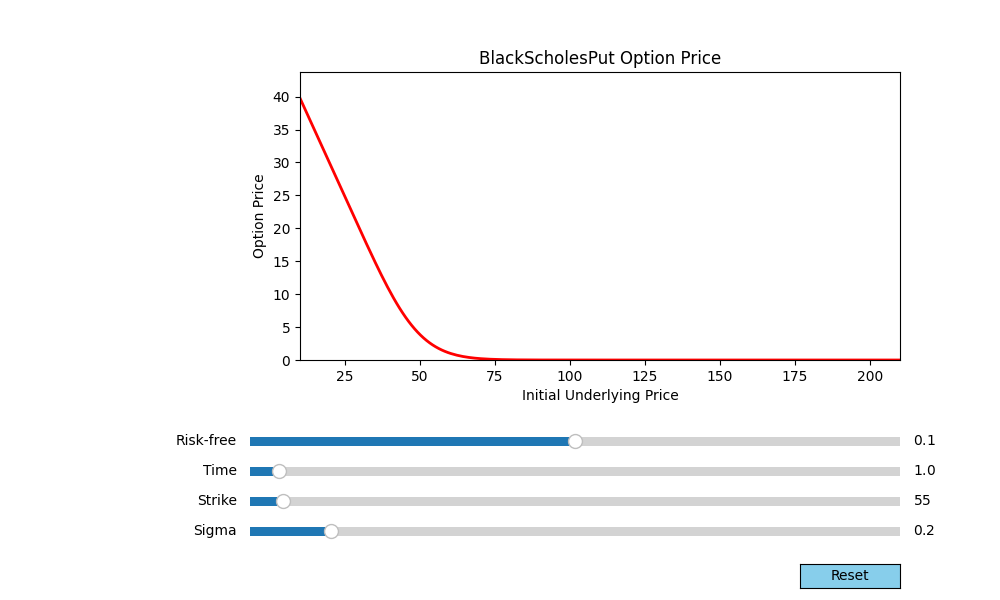

In [57]:
OptionsModel(BlackScholesPut)

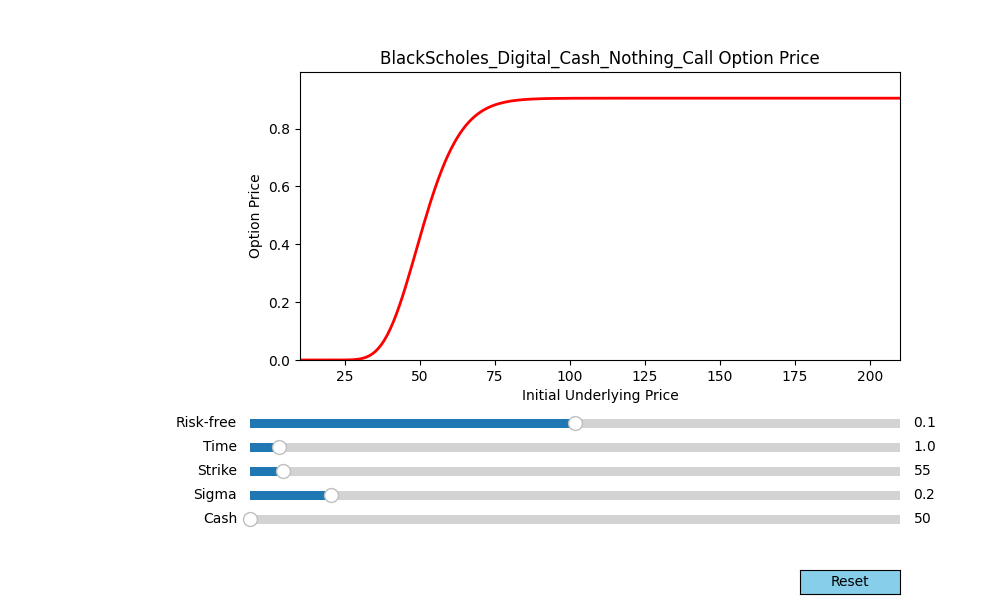

In [58]:
OptionsModelWithCash(BlackScholes_Digital_Cash_Nothing_Call)

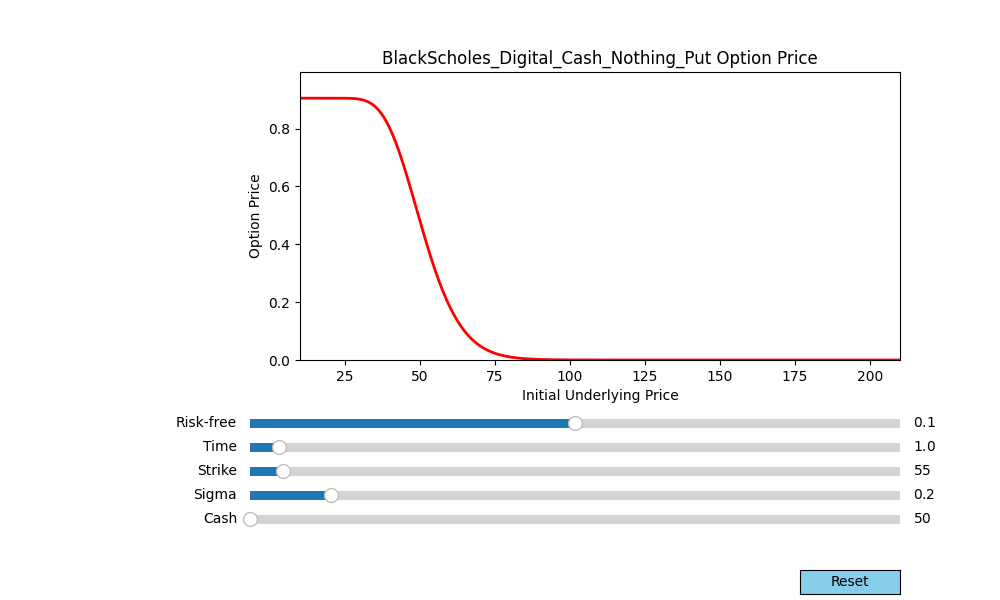

In [59]:
OptionsModelWithCash(BlackScholes_Digital_Cash_Nothing_Put)

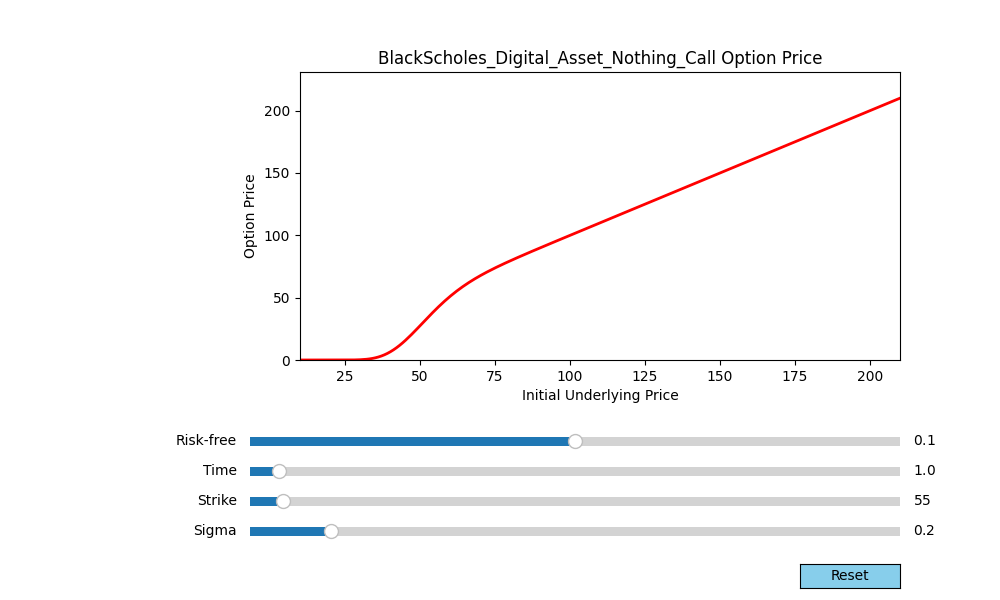

In [60]:
OptionsModel(BlackScholes_Digital_Asset_Nothing_Call)

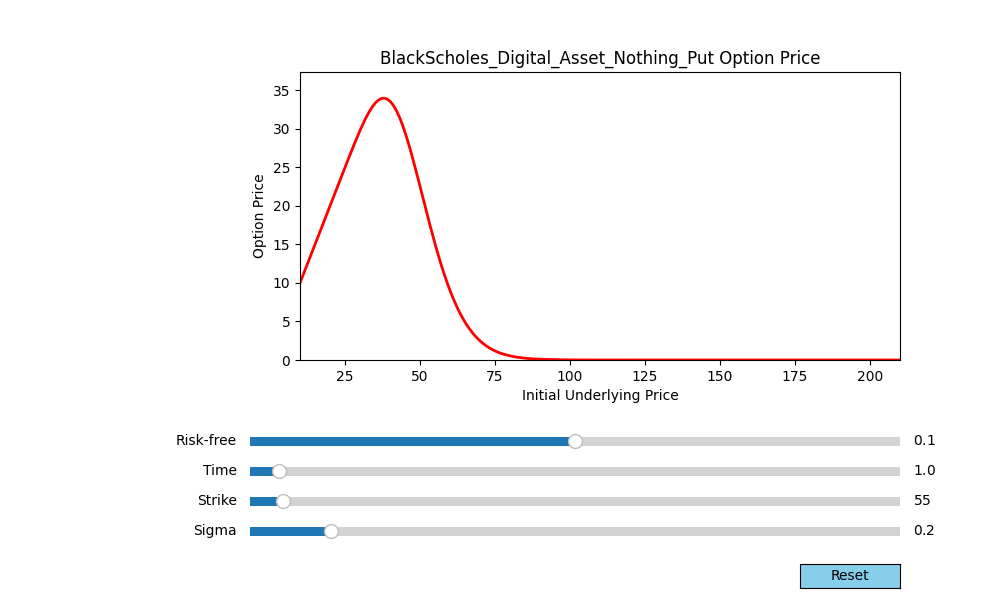

In [61]:
OptionsModel(BlackScholes_Digital_Asset_Nothing_Put)

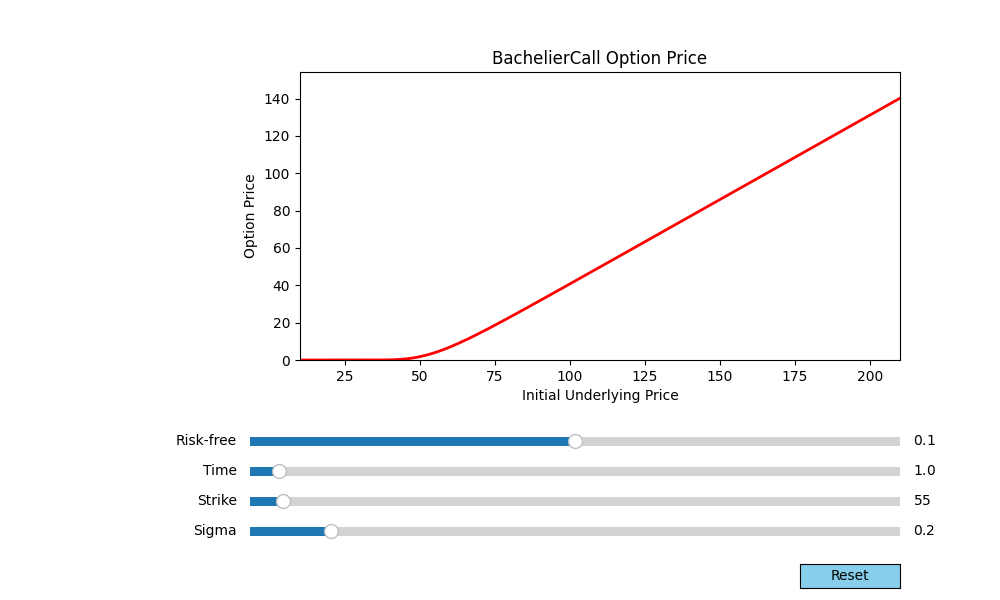

In [62]:
OptionsModel(BachelierCall)

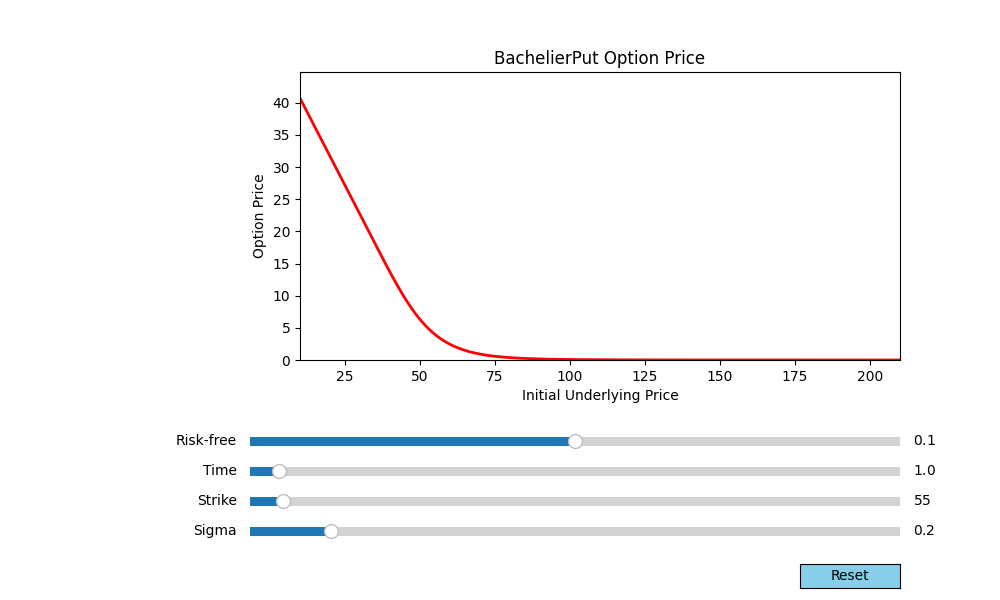

In [63]:
OptionsModel(BachelierPut)

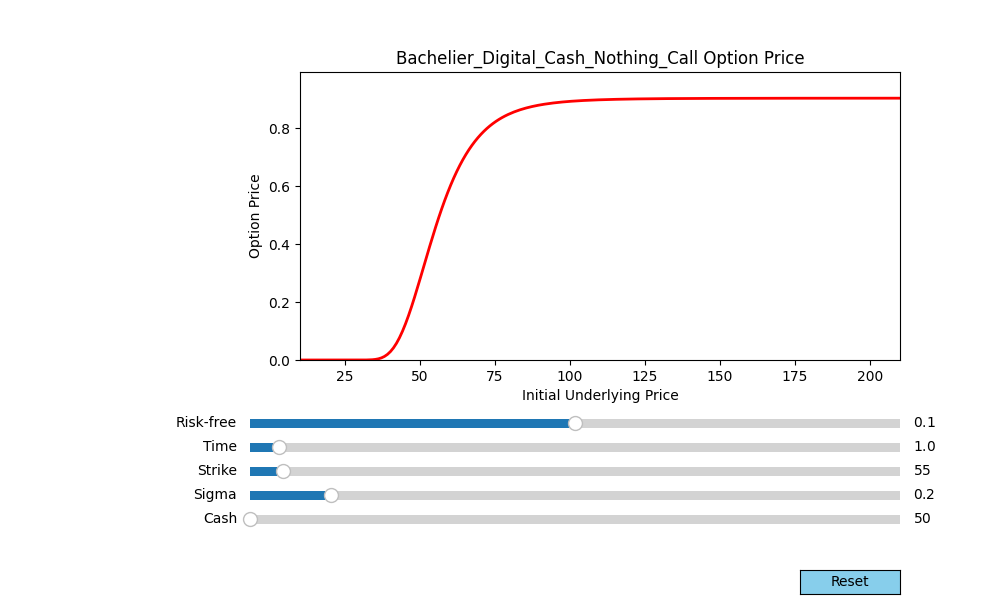

In [64]:
OptionsModelWithCash(Bachelier_Digital_Cash_Nothing_Call)

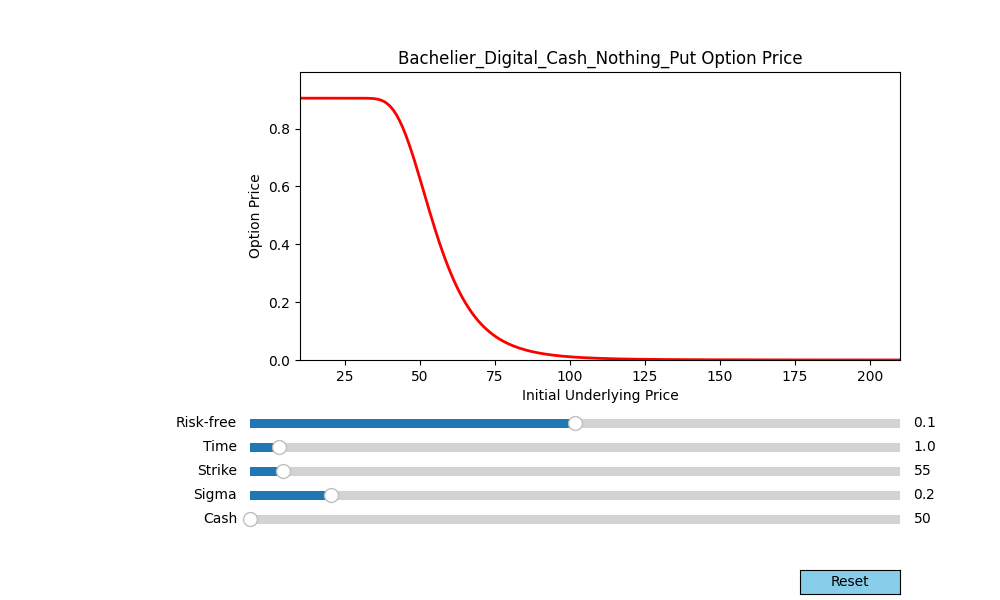

In [65]:
OptionsModelWithCash(Bachelier_Digital_Cash_Nothing_Put)

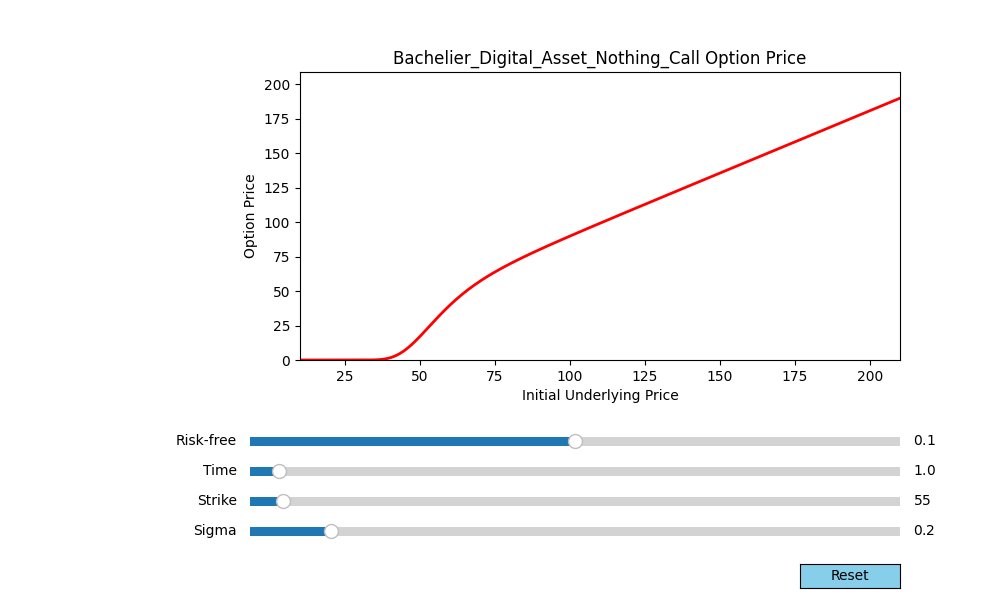

In [66]:
OptionsModel(Bachelier_Digital_Asset_Nothing_Call)

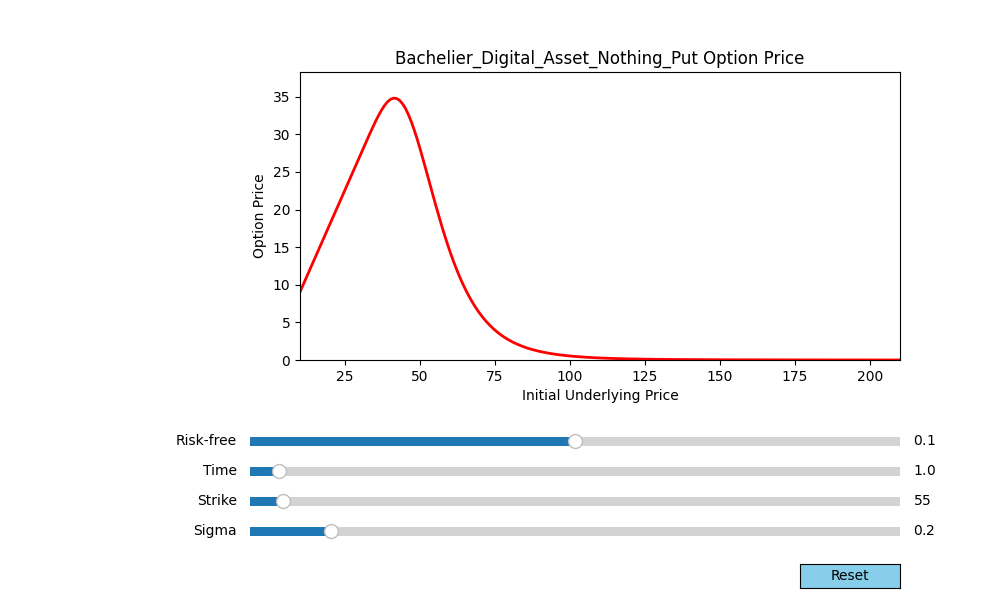

In [67]:
OptionsModel(Bachelier_Digital_Asset_Nothing_Put)

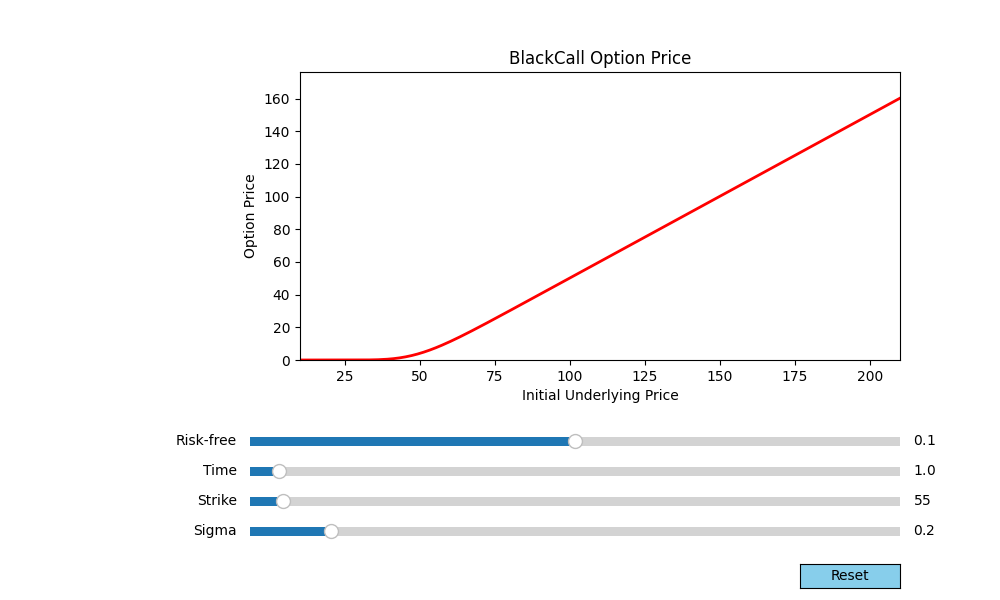

In [68]:
OptionsModel(BlackCall)

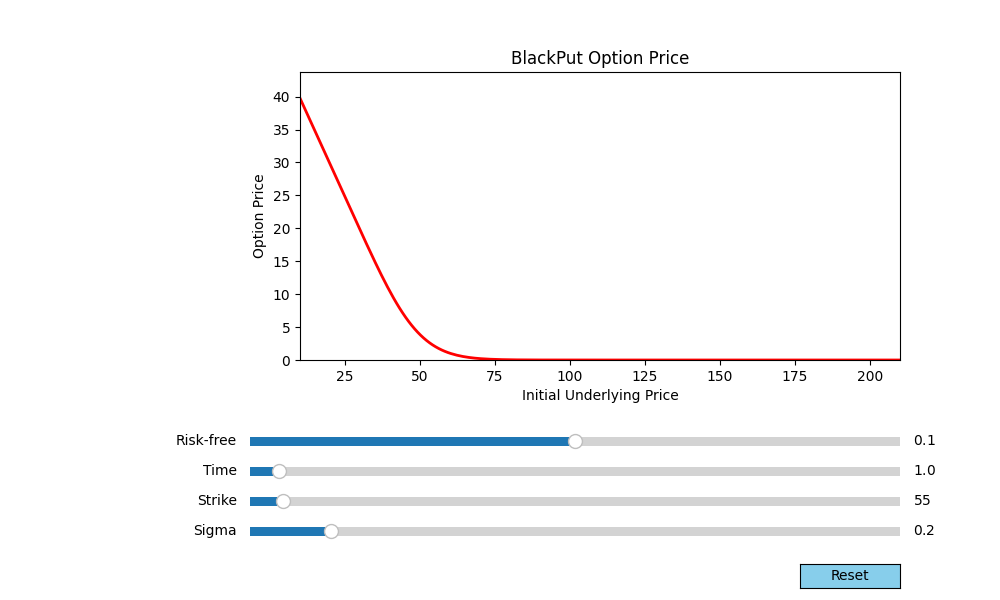

In [69]:
OptionsModel(BlackPut)

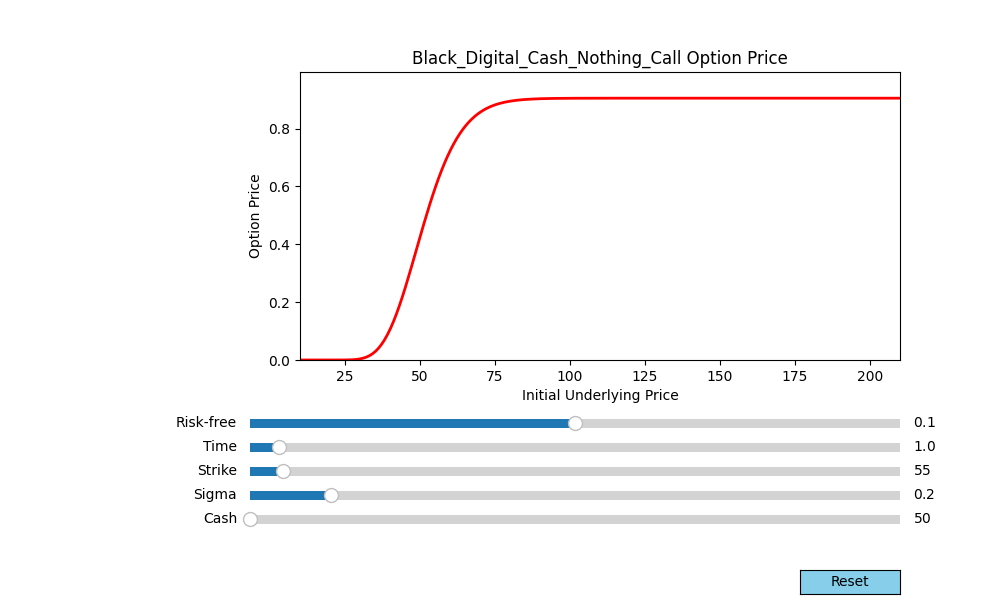

In [70]:
OptionsModelWithCash(Black_Digital_Cash_Nothing_Call)

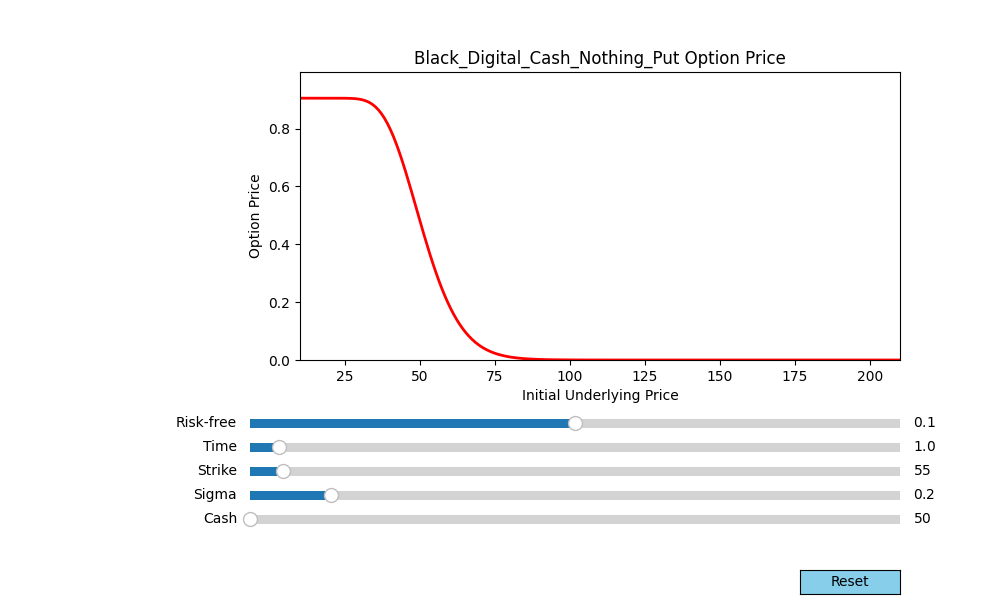

In [71]:
OptionsModelWithCash(Black_Digital_Cash_Nothing_Put)

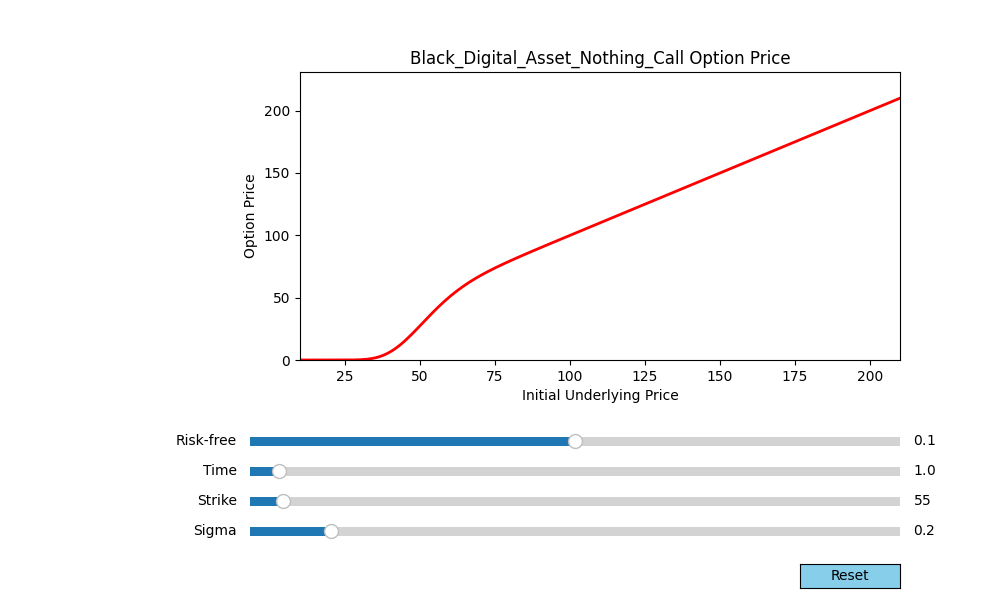

In [72]:
OptionsModel(Black_Digital_Asset_Nothing_Call)

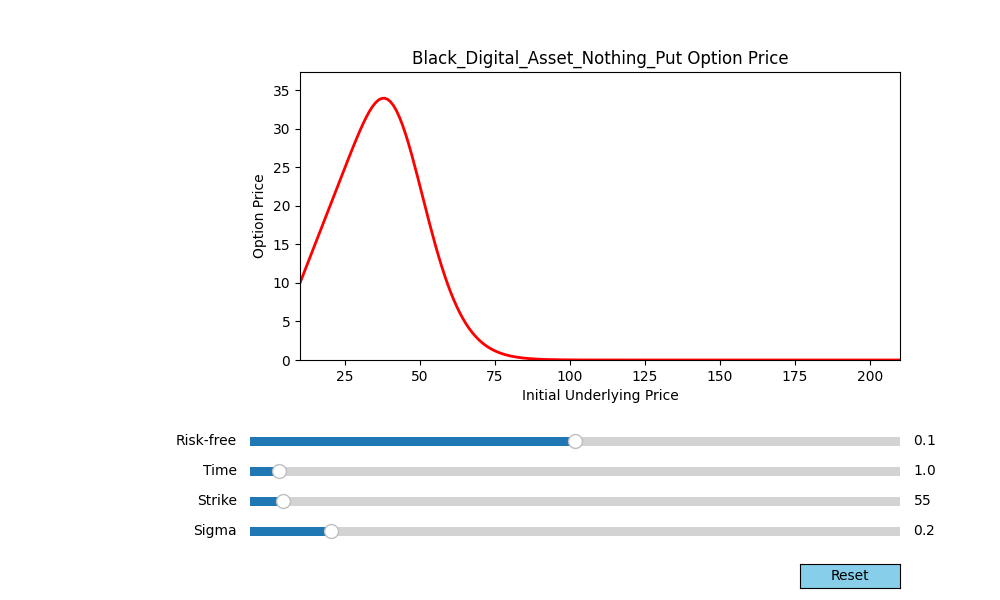

In [73]:
OptionsModel(Black_Digital_Asset_Nothing_Put)

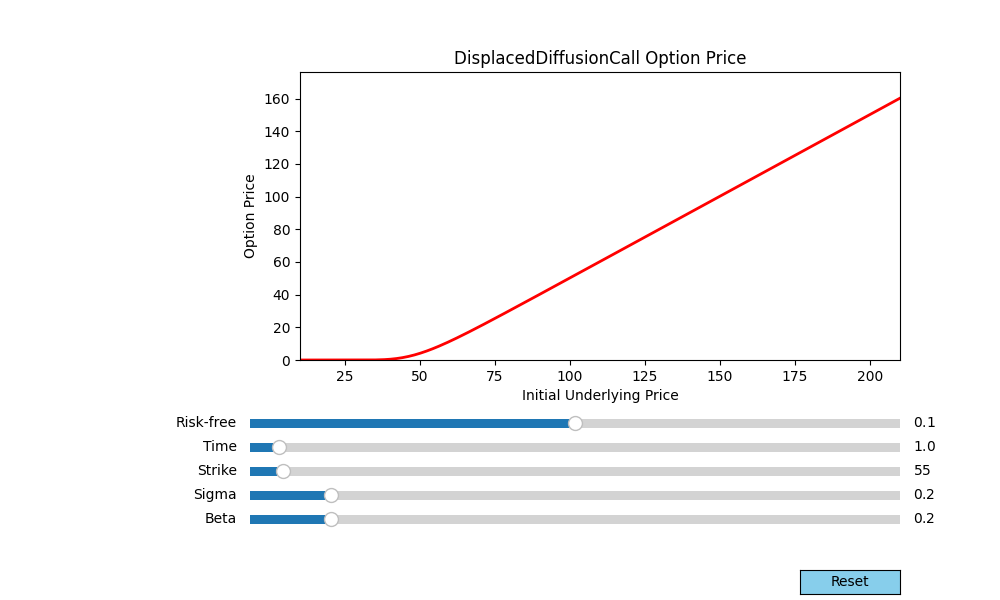

In [74]:
OptionsModelWithBeta(DisplacedDiffusionCall)

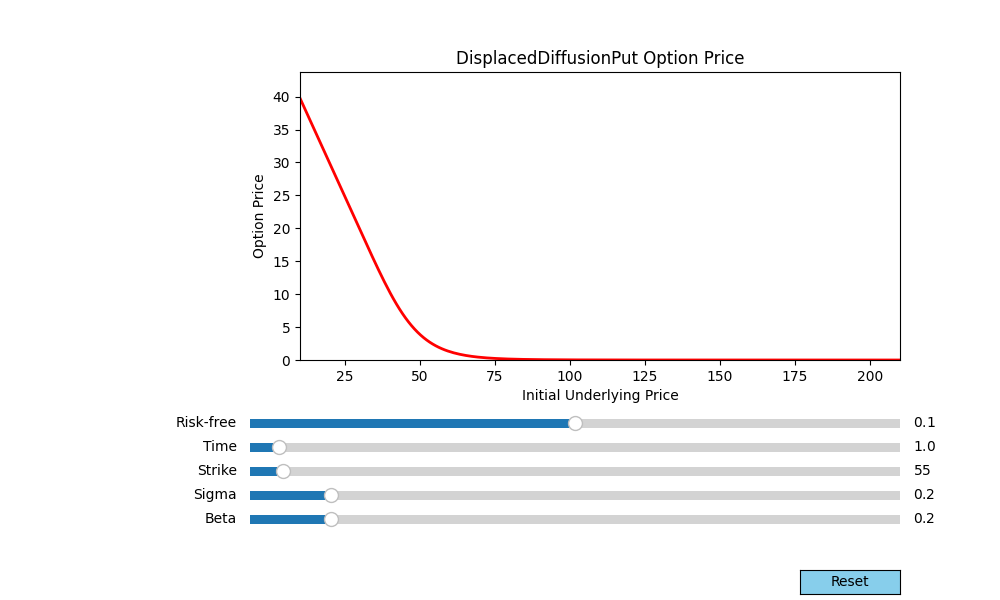

In [75]:
OptionsModelWithBeta(DisplacedDiffusionPut)

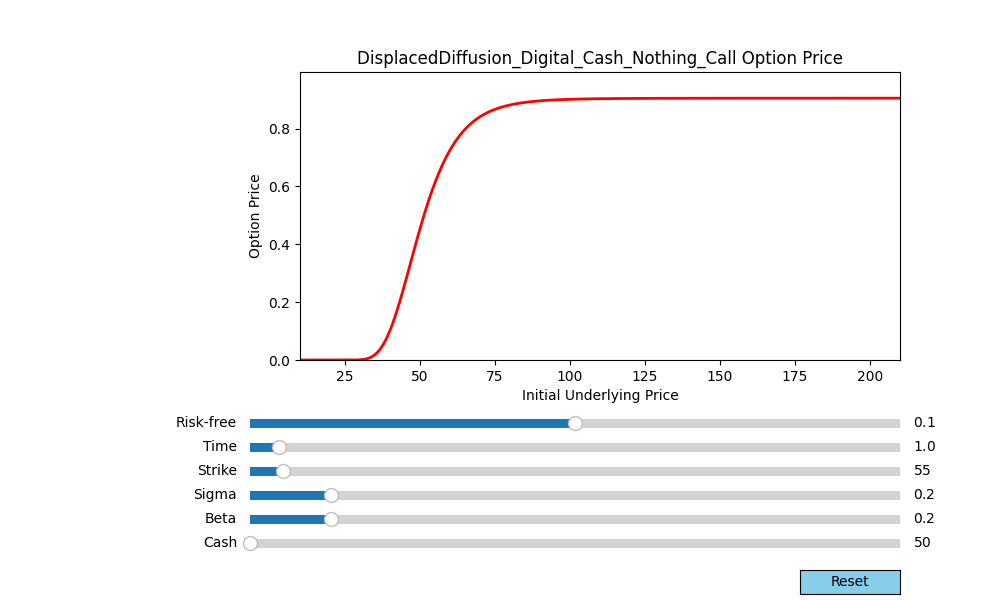

In [76]:
OptionsModelWithCashBeta(DisplacedDiffusion_Digital_Cash_Nothing_Call)

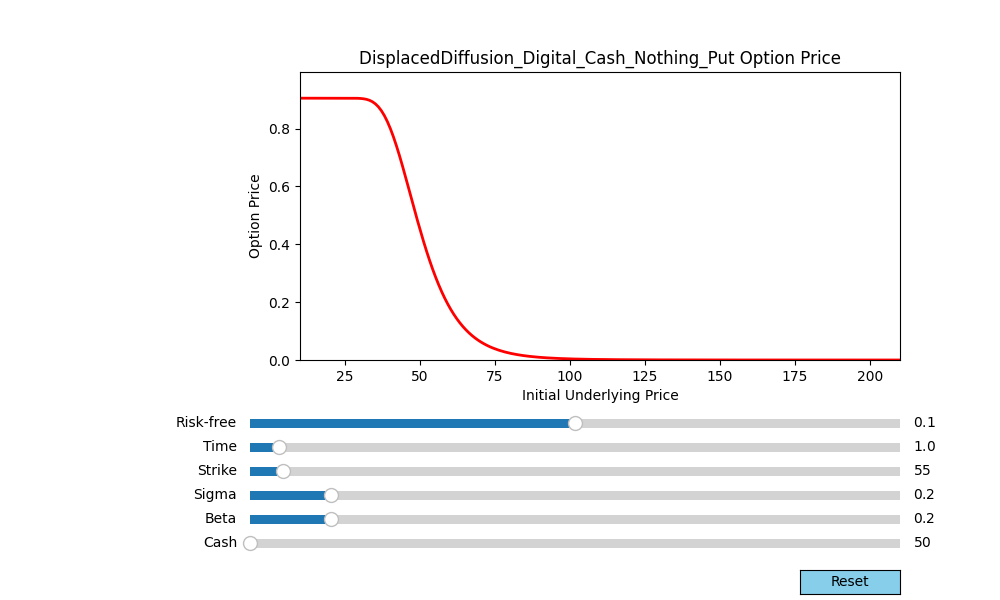

In [77]:
OptionsModelWithCashBeta(DisplacedDiffusion_Digital_Cash_Nothing_Put)

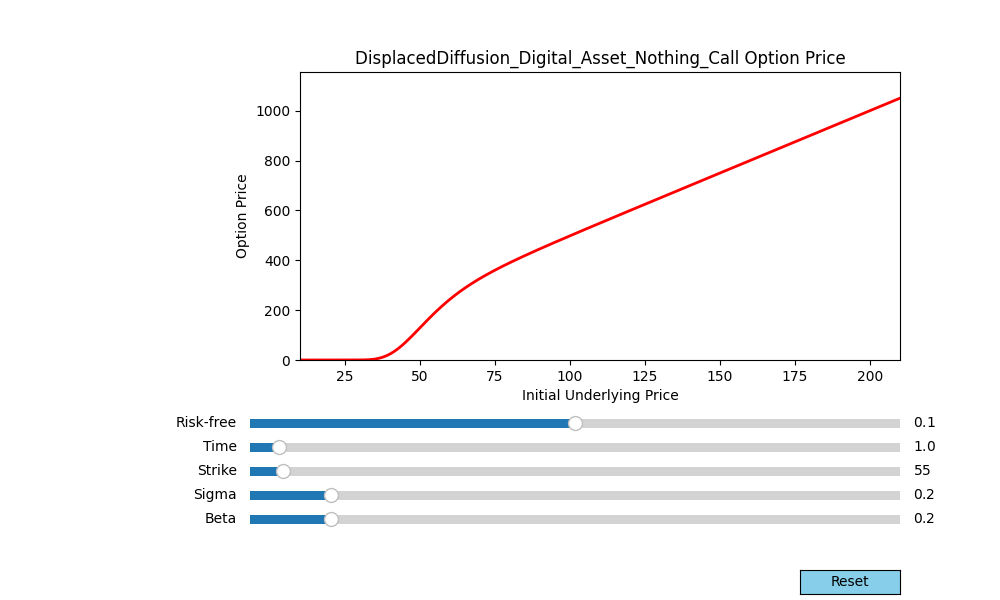

In [78]:
OptionsModelWithBeta(DisplacedDiffusion_Digital_Asset_Nothing_Call)

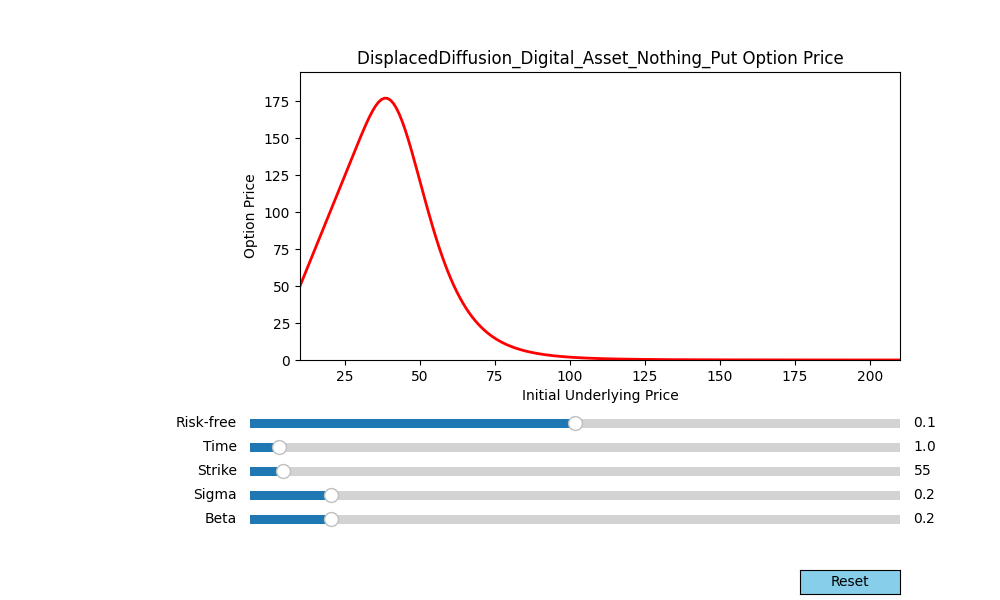

In [79]:
OptionsModelWithBeta(DisplacedDiffusion_Digital_Asset_Nothing_Put)